# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-27 19:00:38.307071


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/26/20


,12/26/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,18982634,331909,1.75
Brazil,7465806,190795,2.56
India,10187850,147622,1.45
Mexico,1377217,122026,8.86
Italy,2038759,71620,3.51
United Kingdom,2262735,70513,3.12
France,2607688,62694,2.40


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/26/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
59837,US,18656776,2020-12-24,329023.0,2899.0,198403.0,206741.285714
59836,US,18458373,2020-12-23,326124.0,3359.0,228131.0,212142.428571
59835,US,18230242,2020-12-22,322765.0,3401.0,195033.0,214895.571429
59834,US,18035209,2020-12-21,319364.0,1696.0,190519.0,215428.857143
59833,US,17844690,2020-12-20,317668.0,1509.0,189099.0,215761.285714
59832,US,17655591,2020-12-19,316159.0,2549.0,196295.0,216053.142857
59831,US,17459296,2020-12-18,313610.0,2821.0,249709.0,219324.285714


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/26/20


,12/26/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,914522,37286.0,4.08
Texas,1668138,26916.0,1.61
California,2120610,24218.0,1.14
Florida,1264588,21135.0,1.67
New Jersey,458901,18613.0,4.06
Illinois,934142,17224.0,1.84
Pennsylvania,608767,14858.0,2.44


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/26/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
2037,California,2040188,2020-12-24,23881.0,323.0,37694.0,40887.714286
2036,California,2002494,2020-12-23,23558.0,319.0,43986.0,41990.714286
2035,California,1958508,2020-12-22,23239.0,402.0,34621.0,44823.714286
2034,California,1923887,2020-12-21,22837.0,162.0,39854.0,44627.714286
2033,California,1884033,2020-12-20,22675.0,93.0,41476.0,42665.000000
2032,California,1842557,2020-12-19,22582.0,212.0,40362.0,41911.571429
2031,California,1802195,2020-12-18,22370.0,276.0,48221.0,40854.285714


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/26/20


,12/26/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,706448,9438.0,1.34
Orange,144542,1845.0,1.28
Riverside,166690,1829.0,1.10
San Bernardino,181812,1429.0,0.79
San Diego,142647,1402.0,0.98
Sacramento,61630,809.0,1.31
Santa Clara,63302,652.0,1.03


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/26/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
6457,Los Angeles,677299,2020-12-24,9299.0,146.0,13345.0,13853.428571
6456,Los Angeles,663954,2020-12-23,9153.0,137.0,16412.0,13992.714286
6455,Los Angeles,647542,2020-12-22,9016.0,85.0,12693.0,14824.714286
6454,Los Angeles,634849,2020-12-21,8931.0,56.0,11179.0,14588.428571
6453,Los Angeles,623670,2020-12-20,8875.0,58.0,13298.0,14026.285714
6452,Los Angeles,610372,2020-12-19,8817.0,60.0,13651.0,13928.571429
6451,Los Angeles,596721,2020-12-18,8757.0,93.0,16396.0,13583.714286
6450,Los Angeles,580325,2020-12-17,8664.0,96.0,14320.0,13201.142857
6449,Los Angeles,566005,2020-12-16,8568.0,137.0,22236.0,12962.000000
6448,Los Angeles,543769,2020-12-15,8431.0,86.0,11039.0,11064.000000



7 day new US cases as of 12/26/20


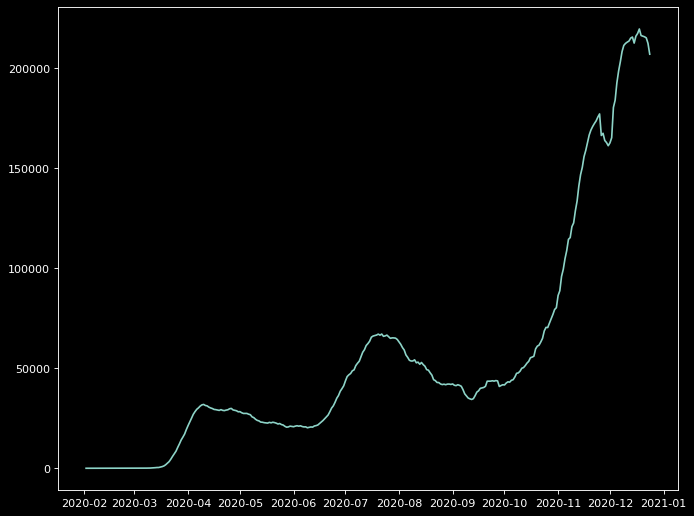

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/26/20


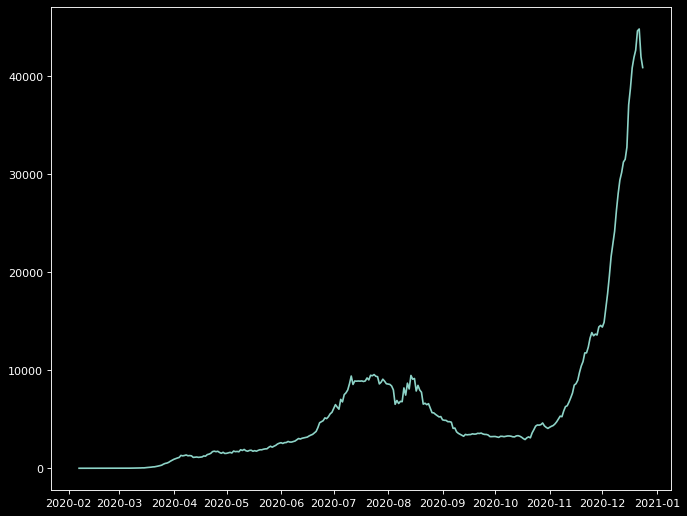

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/26/20


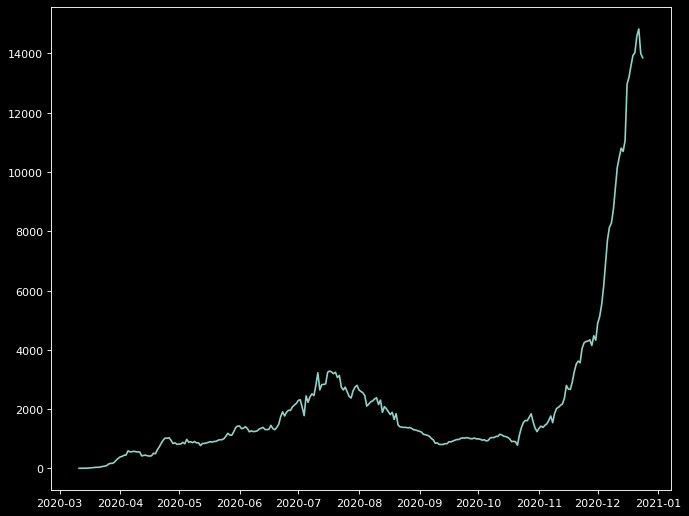

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()